# Ejercicio 5

In [1]:
from random import random, seed
import matplotlib.pyplot as plt

## 5I

In [2]:
def bin_inv(n,p):
    ''' F(i)    = p(i) + F(i-1)
        
        p(0)    = (1-p)**n
        p(i+1)  = p(i) * (n-i) * (i+1)
    '''
    c = p / (1-p)
    prob = (1-p)**n
    f, i = prob, 0
    u = random()
    while f <= u:
        prob *= c * (n-i) / (i+1)
        f += prob
        i += 1 
    return i

## 5II

In [3]:
def bin_sim(n,p):
    '''  
    '''
    i = 0
    for _ in range(n):
        u = random()
        if p >= u:
            i += 1
    return i

## Auxiliares

In [12]:
import time 

def get_probs(g, nsim, *args):
    seed(1000)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf

def plot_probs(vars, nsim):
    i = -0.5
    for n, g, v in vars:
        print(75*'-')
        print(n)

        acc, perf = get_probs(g, nsim, *v)
        
        print(f'Got:\t {acc}\n' + 
              f'Perf:\t {perf:.3}ms')
        
        x_axis = list(map(lambda x: x + i*0.5, acc.keys()))
        y_axis = acc.values()
        plt.bar(x_axis,y_axis, 0.5, label=n)
        
        i += 1

def binom_probs(n,p):
    py = []
    prob = (1-p)**n
    py.append(prob)
    for j in range(n):
        prob *= (n-j)/(j+1)
        prob *= p/(1-p)
        py.append(prob)
    return py

def plot_expected(probs):
    exp_x = []
    exp_y = []
    for i in range(len(probs)):
        for j in [-1,1]:
            exp_x.append(i+0.5*j)
            exp_y.append(probs[i])

    plt.plot(exp_x, exp_y,color='red', label="Original")
    return exp_x, exp_y

## Evaluacion

---------------------------------------------------------------------------
Invertida
Got:	 {0: 0.031, 1: 0.122, 2: 0.2283, 3: 0.2645, 4: 0.2052, 5: 0.1022, 6: 0.0362, 7: 0.0092, 8: 0.0014}
Perf:	 0.0127ms
---------------------------------------------------------------------------
Simulada 
Got:	 {0: 0.0267, 1: 0.1203, 2: 0.2435, 3: 0.2622, 4: 0.2007, 5: 0.1016, 6: 0.0353, 7: 0.0083, 8: 0.0014}
Perf:	 0.012ms


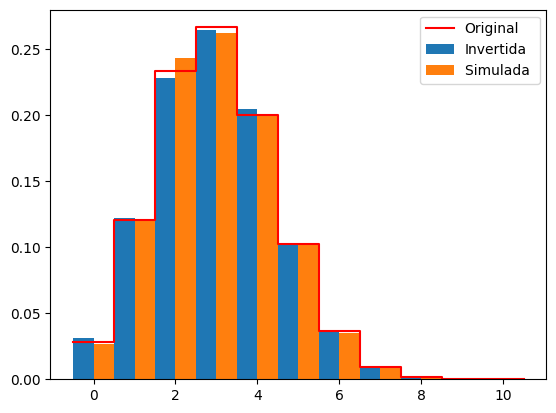

In [13]:
# Parametros
N = 10
P = 0.3

EXPECTED = binom_probs(N,P)

# Variables
vars = [
    ('Invertida',bin_inv ,[N,P]),
    ('Simulada ',bin_sim ,[N,P])
]

plot_expected(EXPECTED)
plot_probs(vars, 10_000)
    
plt.legend()
plt.show()